In [65]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
from matplotlib.pylab import plt

In [77]:
%matplotlib inline

In [78]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
'2015-Jul-6', '07-07-2015', '20160708'])

In [144]:
dates.to_period('Y')

PeriodIndex(['2015', '2015', '2015', '2015', '2016'], dtype='period[A-DEC]', freq='A-DEC')

In [145]:
goog=pd.Series([
   46.0,
  72.0,
  98.0,
  87.0,
 105.0,
  42.0,
  25.0,
  73.0,
  90.0,
 109.0,
  82.0,
],index=np.array([1518452094,   
1521044094,   
1523636094,   
1526228094,   
1528820093,   
1531412093,   
1534004093,   
1536596093,   
1539188093,   
1541780093,   
1544372093,]))

In [146]:
pd.to_datetime(goog.index, unit='s')

DatetimeIndex(['2018-02-12 16:14:54', '2018-03-14 16:14:54',
               '2018-04-13 16:14:54', '2018-05-13 16:14:54',
               '2018-06-12 16:14:53', '2018-07-12 16:14:53',
               '2018-08-11 16:14:53', '2018-09-10 16:14:53',
               '2018-10-10 16:14:53', '2018-11-09 16:14:53',
               '2018-12-09 16:14:53'],
              dtype='datetime64[ns]', freq=None)

In [147]:
goog.index = pd.to_datetime(goog.index, unit='s')

In [148]:
goog

2018-02-12 16:14:54     46.0
2018-03-14 16:14:54     72.0
2018-04-13 16:14:54     98.0
2018-05-13 16:14:54     87.0
2018-06-12 16:14:53    105.0
2018-07-12 16:14:53     42.0
2018-08-11 16:14:53     25.0
2018-09-10 16:14:53     73.0
2018-10-10 16:14:53     90.0
2018-11-09 16:14:53    109.0
2018-12-09 16:14:53     82.0
dtype: float64

In [149]:
goog.values

array([ 46.,  72.,  98.,  87., 105.,  42.,  25.,  73.,  90., 109.,  82.])

In [150]:
goog.index.to_pydatetime()

array([datetime.datetime(2018, 2, 12, 16, 14, 54),
       datetime.datetime(2018, 3, 14, 16, 14, 54),
       datetime.datetime(2018, 4, 13, 16, 14, 54),
       datetime.datetime(2018, 5, 13, 16, 14, 54),
       datetime.datetime(2018, 6, 12, 16, 14, 53),
       datetime.datetime(2018, 7, 12, 16, 14, 53),
       datetime.datetime(2018, 8, 11, 16, 14, 53),
       datetime.datetime(2018, 9, 10, 16, 14, 53),
       datetime.datetime(2018, 10, 10, 16, 14, 53),
       datetime.datetime(2018, 11, 9, 16, 14, 53),
       datetime.datetime(2018, 12, 9, 16, 14, 53)], dtype=object)

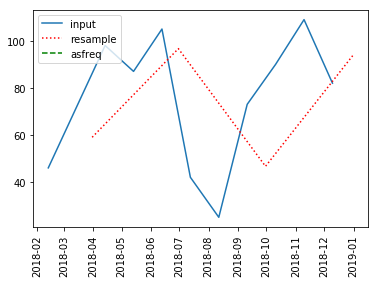

In [140]:
plt.xticks(rotation=90)
plt.plot(goog.index, goog.values)
plt.plot(goog.resample('Q').mean().index, goog.resample('Q').mean().values, 'r:')
plt.plot(goog.asfreq('QS').index, goog.asfreq('QS').values, 'g--')
plt.legend(['input', 'resample', 'asfreq'],
loc='upper left');
plt.show()

In [122]:
goog.resample('QS').mean().index

DatetimeIndex(['2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01'], dtype='datetime64[ns]', freq='QS-JAN')

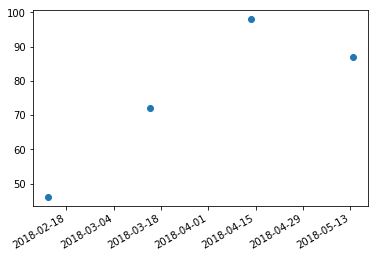

In [154]:
goog.asfreq('H').plot( marker='o')

In [179]:
rolling = goog.rolling(3, center=True)
data = pd.DataFrame({'input': goog,
'one-year rolling_mean': rolling.mean(),
'one-year rolling_std': rolling.std(),
'one-year rolling_sum': rolling.sum()}
                   )


In [180]:
goog

2018-02-12 16:14:54     46.0
2018-03-14 16:14:54     72.0
2018-04-13 16:14:54     98.0
2018-05-13 16:14:54     87.0
2018-06-12 16:14:53    105.0
2018-07-12 16:14:53     42.0
2018-08-11 16:14:53     25.0
2018-09-10 16:14:53     73.0
2018-10-10 16:14:53     90.0
2018-11-09 16:14:53    109.0
2018-12-09 16:14:53     82.0
dtype: float64

In [181]:
data

,input,one-year rolling_mean,one-year rolling_std,one-year rolling_sum
2018-02-12 16:14:54,46.0,NaN,NaN,NaN
2018-03-14 16:14:54,72.0,NaN,NaN,NaN
2018-04-13 16:14:54,98.0,72.000000,26.000000,216.0
2018-05-13 16:14:54,87.0,85.666667,13.051181,257.0
2018-06-12 16:14:53,105.0,96.666667,9.073772,290.0
2018-07-12 16:14:53,42.0,78.000000,32.449961,234.0
2018-08-11 16:14:53,25.0,57.333333,42.146570,172.0
2018-09-10 16:14:53,73.0,46.666667,24.337899,140.0
2018-10-10 16:14:53,90.0,62.666667,33.709544,188.0
2018-11-09 16:14:53,109.0,90.666667,18.009257,272.0


In [172]:
sr = pd.Series([1,2,1,5],index=['a','b','c','d'])

In [4]:
sr

a    1
b    2
c    1
d    5
dtype: int64

In [5]:
sr[sr==1]

a    1
c    1
dtype: int64

In [8]:
list(np.where(sr==1))

[array([0, 2], dtype=int64)]

In [42]:
df = pd.DataFrame({'A': [2, 3], 'B': [6, 9]})

In [43]:
df

,A,B
0,2,6
1,3,9


In [44]:
def foo(a):
    f = a.copy()
    f['G'] = 3
    
def bar(b):
    b['G'] = 9

In [45]:
foo(df)

In [46]:
df

,A,B
0,2,6
1,3,9


In [5]:
w = np.zeros([2, 3])

In [6]:
df_all = pd.read_csv(os.path.join(r'by_col', 'timestamps_for_F2.csv'))

In [7]:
df_all

,Unnamed: 0,1515860094460,1518452094351,1521044094241,1523636094133,1526228094015,1528820093908,1531412093797,1534004093682,1536596093575,1539188093466,1541780093325,1544372093214
0,جمع نقشه راهبردی بهداشت و درمان,91.0,47.0,103.0,133.0,62.0,110.0,66.0,71.0,103.0,78.0,66.0,96.0
1,A-,7022.0,7031.0,7035.0,7026.0,6979.0,7035.0,6967.0,7032.0,7033.0,6988.0,7033.0,7017.0
2,A----1-,2450.0,2470.0,2466.0,2502.0,2461.0,2524.0,2484.0,2535.0,2512.0,2531.0,2550.0,2503.0
3,A----2-,993.0,966.0,1036.0,965.0,1047.0,1024.0,961.0,991.0,969.0,1016.0,958.0,973.0
4,A----3-,455.0,531.0,451.0,473.0,542.0,536.0,475.0,473.0,469.0,515.0,465.0,482.0
5,A----4-,3033.0,2994.0,2960.0,2976.0,2979.0,2981.0,2986.0,2954.0,2987.0,3027.0,2979.0,2989.0
6,جمع چشم انداز بهداشت و درمان,122.0,42.0,92.0,51.0,52.0,118.0,108.0,41.0,98.0,82.0,62.0,99.0
7,B-,71.0,38.0,127.0,45.0,124.0,76.0,70.0,66.0,41.0,86.0,58.0,112.0
8,B-1-,44.0,54.0,86.0,120.0,134.0,79.0,131.0,124.0,83.0,80.0,111.0,73.0
9,B-2-,102.0,42.0,139.0,66.0,128.0,102.0,96.0,61.0,132.0,114.0,136.0,142.0


In [8]:
import os
import pandas as pd
from sklearn.linear_model import perceptron
from sklearn.preprocessing import StandardScaler


class Integrator:
    """Integrator for a set of similar data sources with different timestamps.
        Files have the same prefix followed by a delimiter and timestamp:

        file_prefix@timestamp_1.csv, file_prefix@timestamp_2, ..., file_prefix@timestamp_n.


        Attributes
        ----------
        data : None, 'l2' or 'l1' or 'elasticnet'
            The penalty (aka regularization term) to be used. Defaults to None.

        columns : float
            Constant that multiplies the regularization term if regularization is
            used. Defaults to 0.0001

        files_paths : bool
            Whether the intercept should be estimated or not. If False, the
            data is assumed to be already centered. Defaults to True.

        timestamps : int, optional
            The maximum number of passes over the training data (aka epochs).
            It only impacts the behavior in the ``fit`` method, and not the
            `partial_fit`.
            Defaults to 5. Defaults to 1000 from 0.21, or if tol is not None.

            .. versionadded:: 0.19

        files_names : float or None, optional
            The stopping criterion. If it is not None, the iterations will stop
            when (loss > previous_loss - tol). Defaults to None.
            Defaults to 1e-3 from 0.21.

            .. versionadded:: 0.19

        concatenated_data : bool, optional, default True
            Whether or not the training data should be shuffled after each epoch.

        data_by_timestamp : integer, optional
            The verbosity level

        files_details : double
            Constant by which the updates are multiplied. Defaults to 1.

        column_names : integer, optional
            The number of CPUs to use to do the OVA (One Versus All, for
            multi-class problems) computation. -1 means 'all CPUs'. Defaults
            to 1.

        Parameters
        ----------
        coef_ : array, shape = [1, n_features] if n_classes == 2 else [n_classes,\
                n_features]
            Weights assigned to the features.

        intercept_ : array, shape = [1] if n_classes == 2 else [n_classes]
            Constants in decision function.

        n_iter_ : int
            The actual number of iterations to reach the stopping criterion.
            For multiclass fits, it is the maximum over every binary fit.

        """

    def __init__(self):
        # self.data = {}
        # self.columns = None
        self.files_paths = None
        self.timestamps = None
        self.files_names = None
        self.concatenated_data = None
        self.data_by_timestamp = None
        self.files_details = None
        self.column_names = None
        # self.files_prefix = files_prefix
        # self.files_delimiter = None
        # self.src_path = None

    @staticmethod
    def __extract_timestamp(path, delimiter):
        return os.path.splitext(path.split(delimiter)[1])[0]

    def read_convert_series(self, src_path, files_delimiter):
        """
        :param src_path: Source path to read set of files
        :param files_delimiter:
        :return: Dictionary of timestamp data for each column.
        A key for each column, each key will have a data frame with # of timestamps.
        """
        try:
            files_names = sorted(os.listdir(src_path), key=lambda x: int(self.__extract_timestamp(x, files_delimiter)))
        except IOError:
            raise Exception("Reading Error")

        # self.src_path=path
        # self.src_path=files_delimiter

        files_details = []
        column_names = []

        for file_name in files_names:
            df = pd.read_csv(os.path.join(src_path, file_name))
            column_names.extend(list(df.columns))
            # self.data[str(file['timestamp'])] = df
            # dictionary info for each data file
            files_details.append({'timestamp': os.path.splitext(file_name.split(files_delimiter)[1])[0],
                                  'file_name': file_name, 'df': df
                                  })

        keys_for_concat, values_for_concat = zip(*[(i['timestamp'], i['df']) for i in files_details])
        concatenated_data = pd.concat(values_for_concat, axis=1, keys=keys_for_concat)
        # self.timestamps = [os.path.splitext(path.split(files_delimiter)[1])[0] for path in files_names]
        self.timestamps = list(map(lambda x:self.__extract_timestamp(x, files_delimiter), files_names))
        column_names = sorted(list(set(column_names)))

        data_by_timestamp = {}
        for column in column_names:
            data_by_timestamp[column] = concatenated_data.xs(column, axis=1, level=1, drop_level=True)

        self.concatenated_data = concatenated_data
        self.data_by_timestamp = data_by_timestamp
        self.files_details = files_details
        self.column_names = column_names

        return data_by_timestamp

    def save_series_by_timestamp(self, dst_path, prefix='timestamps_for_', columns=None, index=True, header=False):
        """
        :param header: Save header to output file or not
        :param index: Save index to output file or not
        :param prefix: Prefix for output files
        :param dst_path: Destination path
        :param columns: Set of columns to save timestamps for them
        :return:
        """
        file_ext = '.csv'
        if not os.path.exists(dst_path):
            os.mkdir(dst_path)

        if columns is None:
            columns = self.data_by_timestamp.keys()

        try:
            for col in columns:
                self.data_by_timestamp[col].to_csv(os.path.join(dst_path, prefix + str(col) + file_ext),
                                                   encoding='utf-8-sig',
                                                   index=index, header=header)
        except:
            raise Exception("Failed to save!")


if __name__ == '__main__':
    # df = pd.read_csv(r'feature added\test_data@1515860094460.csv')
    # print(df)
    obj = Integrator()
    obj.read_convert_series(src_path=r'feature added', files_delimiter='@')
    f2_data = obj.data_by_timestamp['F1']
    # obj.save_series_by_timestamp(dst_path='by_col', header=True)
    # print(obj.data_by_timestamp['F2'])

    # from sklearn.cluster import DBSCAN
    #
    # print(f2_data.values)
    # X = StandardScaler().fit_transform(f2_data.values)
    # clustering = DBSCAN(eps=0.1, min_samples=10).fit(X)
    # print(clustering.labels_.shape)
    #
    # for i in clustering.labels_:
    #     print(i)


Exception: Reading Error